In [4]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

In [5]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [10]:
df = fdr.DataReader('294630', '2018-01-01', '2023-01-01') #서남
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()

#며칠데이터로 예측
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)
    
    
n=len(data_y)

train_X = np.array(data_X[0:int(n*0.7)])
train_y = np.array(data_y[0:int(n*0.7)])

val_X = np.array(data_X[int(n*0.7):int(n*0.9)])
val_y = np.array(data_y[int(n*0.7):int(n*0.9)])

test_X = np.array(data_X[int(n*0.9):])
test_y = np.array(data_y[int(n*0.9):])

validation_data = (val_X,val_y)

In [11]:
model2 = Sequential()


forward_layer = LSTM(64, return_sequences=True)
backward_layer = LSTM(64, activation='relu', return_sequences=True,
                      go_backwards=True)

model2.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                        input_shape=(10, 4)))

model2.add(Dropout(0.2))

model2.add(Bidirectional(LSTM(64)))

model2.add(Dropout(0.2))

model2.add(Dense(units=1))


model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 10, 128)          35328     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 10, 128)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 134,273
Trainable params: 134,273
Non-tr

In [12]:
model2.compile(optimizer='adam', 
              loss='mean_squared_error')
model2.fit(train_X, 
          train_y, 
          epochs=100, 
          batch_size=30,
          validation_data=validation_data
         )



pred_y = model2.predict(test_X)

Epoch 1/100
17/17 [==============================] - 7s 89ms/step - loss: 0.0816 - val_loss: 0.0036
Epoch 2/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0150 - val_loss: 0.0072
Epoch 3/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0093 - val_loss: 0.0020
Epoch 4/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0094 - val_loss: 0.0018
Epoch 5/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0085 - val_loss: 0.0024
Epoch 6/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0080 - val_loss: 0.0019
Epoch 7/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0079 - val_loss: 0.0018
Epoch 8/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0074 - val_loss: 0.0033
Epoch 9/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0066 - val_loss: 9.2283e-04
Epoch 10/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0070 - val_loss: 0.

17/17 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 6.9185e-04
Epoch 81/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0021 - val_loss: 5.5233e-04
Epoch 82/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 9.5163e-04
Epoch 83/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 6.9803e-04
Epoch 84/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 85/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 86/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0027 - val_loss: 5.4110e-04
Epoch 87/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 5.9590e-04
Epoch 88/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 6.5205e-04
Epoch 89/100
17/17 [==============================] - 0s 15ms/step - loss: 0

3/3 [==============================] - 0s 4ms/step


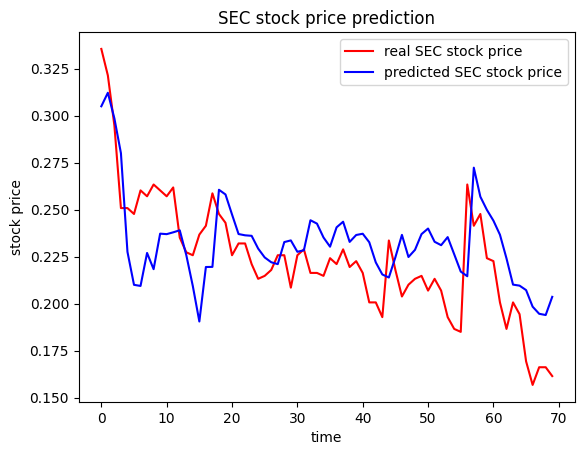

In [13]:
pred_y = model2.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [14]:
mse = model2.evaluate(test_X, test_y, batch_size=30)
print("mse :", mse)

y_predict = model2.predict(test_X)
print(y_predict)

3/3 [==============================] - 0s 4ms/step - loss: 6.5489e-04
mse : 0.000654887524433434
3/3 [==============================] - 0s 4ms/step
[[0.30492148]
 [0.3121109 ]
 [0.2984588 ]
 [0.2799809 ]
 [0.2275066 ]
 [0.20997335]
 [0.20937717]
 [0.2269147 ]
 [0.21829677]
 [0.23718274]
 [0.23691949]
 [0.23789257]
 [0.23897263]
 [0.22583303]
 [0.20932208]
 [0.19047005]
 [0.21944737]
 [0.21950907]
 [0.26052016]
 [0.25802535]
 [0.2473742 ]
 [0.23697752]
 [0.23630409]
 [0.2360327 ]
 [0.22924328]
 [0.22453606]
 [0.22197244]
 [0.2209741 ]
 [0.23270969]
 [0.23359221]
 [0.22753483]
 [0.22835943]
 [0.24431783]
 [0.24251552]
 [0.2351442 ]
 [0.23025423]
 [0.24053988]
 [0.24352485]
 [0.23279405]
 [0.23646808]
 [0.23713946]
 [0.23262203]
 [0.22189614]
 [0.21548642]
 [0.21385427]
 [0.22462398]
 [0.23652852]
 [0.2247582 ]
 [0.22857766]
 [0.2369448 ]
 [0.2399093 ]
 [0.23286581]
 [0.23105127]
 [0.23534557]
 [0.22621517]
 [0.21701716]
 [0.21453607]
 [0.2722677 ]
 [0.2568379 ]
 [0.24983537]
 [0.24410616

In [15]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))
print("RMSE :", RMSE(test_y, y_predict))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, y_predict)
print("R2 :", f2_y_predict)

RMSE : 0.02559077160353461
R2 : 0.36198454661112456


In [16]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


df = fdr.DataReader('035420', '2018-01-01', '2023-01-01') #네이버
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()

#며칠데이터로 예측
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)
    
    
n=len(data_y)

train_X = np.array(data_X[0:int(n*0.7)])
train_y = np.array(data_y[0:int(n*0.7)])

val_X = np.array(data_X[int(n*0.7):int(n*0.9)])
val_y = np.array(data_y[int(n*0.7):int(n*0.9)])

test_X = np.array(data_X[int(n*0.9):])
test_y = np.array(data_y[int(n*0.9):])

validation_data = (val_X,val_y)

model2 = Sequential()


forward_layer = LSTM(64, return_sequences=True)
backward_layer = LSTM(64, activation='relu', return_sequences=True,
                      go_backwards=True)

model2.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                        input_shape=(10, 4)))

model2.add(Dropout(0.2))

model2.add(Bidirectional(LSTM(64)))

model2.add(Dropout(0.2))

model2.add(Dense(units=1))


model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 10, 128)          35328     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 10, 128)           0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 134,273
Trainable params: 134,273
Non-tr

In [17]:
model2.compile(optimizer='adam', 
              loss='mean_squared_error')
model2.fit(train_X, 
          train_y, 
          epochs=100, 
          batch_size=30,
          validation_data=validation_data
         )



pred_y = model2.predict(test_X)

Epoch 1/100
29/29 [==============================] - 7s 58ms/step - loss: 0.0338 - val_loss: 0.0027
Epoch 2/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 3/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 5/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 6/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 7/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 9/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 10/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 0.0019

Epoch 81/100
29/29 [==============================] - 0s 16ms/step - loss: 7.5286e-04 - val_loss: 0.0011
Epoch 82/100
29/29 [==============================] - 0s 16ms/step - loss: 7.8698e-04 - val_loss: 0.0010
Epoch 83/100
29/29 [==============================] - 0s 17ms/step - loss: 7.3233e-04 - val_loss: 0.0015
Epoch 84/100
29/29 [==============================] - 0s 15ms/step - loss: 8.4024e-04 - val_loss: 0.0011
Epoch 85/100
29/29 [==============================] - 0s 15ms/step - loss: 7.4551e-04 - val_loss: 9.9210e-04
Epoch 86/100
29/29 [==============================] - 0s 17ms/step - loss: 7.1152e-04 - val_loss: 0.0023
Epoch 87/100
29/29 [==============================] - 0s 16ms/step - loss: 7.7766e-04 - val_loss: 0.0011
Epoch 88/100
29/29 [==============================] - 1s 18ms/step - loss: 7.7678e-04 - val_loss: 0.0012
Epoch 89/100
29/29 [==============================] - 0s 16ms/step - loss: 7.4020e-04 - val_loss: 0.0014
Epoch 90/100
29/29 [==============================]

4/4 [==============================] - 0s 4ms/step


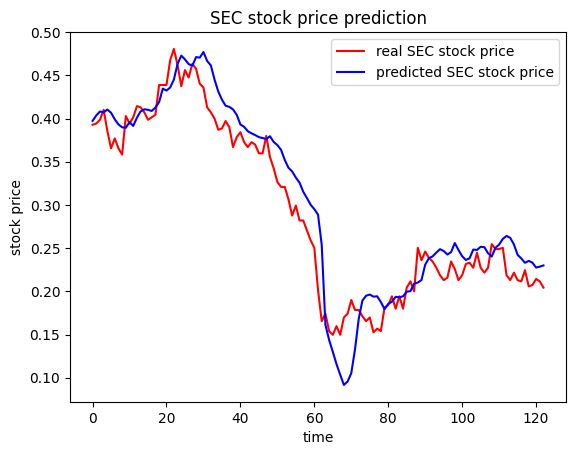

In [18]:
pred_y = model2.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [19]:
mse = model2.evaluate(test_X, test_y, batch_size=30)
print("mse :", mse)

y_predict = model2.predict(test_X)

5/5 [==============================] - 0s 5ms/step - loss: 9.5237e-04
mse : 0.0009523655171506107
4/4 [==============================] - 0s 4ms/step


In [20]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))
print("RMSE :", RMSE(test_y, y_predict))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, y_predict)
print("R2 :", f2_y_predict)

RMSE : 0.030860422562285213
R2 : 0.9029362026127508


In [21]:
#포스코

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


df = fdr.DataReader('005490', '2018-01-01', '2023-01-01') #서남
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()

#며칠데이터로 예측
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)
    
    
n=len(data_y)

train_X = np.array(data_X[0:int(n*0.7)])
train_y = np.array(data_y[0:int(n*0.7)])

val_X = np.array(data_X[int(n*0.7):int(n*0.9)])
val_y = np.array(data_y[int(n*0.7):int(n*0.9)])

test_X = np.array(data_X[int(n*0.9):])
test_y = np.array(data_y[int(n*0.9):])

validation_data = (val_X,val_y)

model2 = Sequential()


forward_layer = LSTM(64, return_sequences=True)
backward_layer = LSTM(64, activation='relu', return_sequences=True,
                      go_backwards=True)

model2.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                        input_shape=(10, 4)))

model2.add(Dropout(0.2))

model2.add(Bidirectional(LSTM(64)))

model2.add(Dropout(0.2))

model2.add(Dense(units=1))


model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 10, 128)          35328     
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 10, 128)           0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 134,273
Trainable params: 134,273
Non-tr

In [22]:
model2.compile(optimizer='adam', 
              loss='mean_squared_error')
model2.fit(train_X, 
          train_y, 
          epochs=100, 
          batch_size=30,
          validation_data=validation_data
         )



pred_y = model2.predict(test_X)

Epoch 1/100
29/29 [==============================] - 7s 66ms/step - loss: 0.0240 - val_loss: 0.0046
Epoch 2/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 3/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 4/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 5/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 6/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 7/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 8/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 9/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 10/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0028 - val_loss: 0.0024

Epoch 82/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 83/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 84/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0012 - val_loss: 9.5021e-04
Epoch 85/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0012 - val_loss: 8.7673e-04
Epoch 86/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0012 - val_loss: 8.7875e-04
Epoch 87/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0012 - val_loss: 8.8716e-04
Epoch 88/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 89/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 90/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0012 - val_loss: 8.4300e-04
Epoch 91/100
29/29 [==============================] - 0s 16ms/step - lo

4/4 [==============================] - 0s 5ms/step


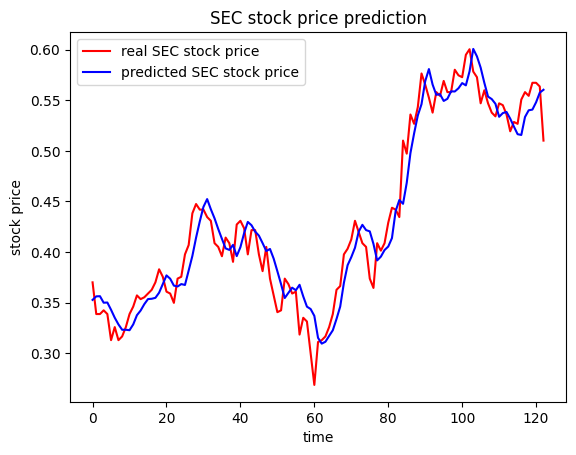

In [23]:
pred_y = model2.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [25]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))
print("RMSE :", RMSE(test_y, y_predict))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, y_predict)
print("R2 :", f2_y_predict)

RMSE : 0.022264049921326457
R2 : 0.9374537318793316


In [39]:
#한국전력
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


df = fdr.DataReader('015760', '2018-01-01', '2023-01-01') #서남
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()

#며칠데이터로 예측
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)
    
    
n=len(data_y)

train_X = np.array(data_X[0:int(n*0.7)])
train_y = np.array(data_y[0:int(n*0.7)])

val_X = np.array(data_X[int(n*0.7):int(n*0.9)])
val_y = np.array(data_y[int(n*0.7):int(n*0.9)])

test_X = np.array(data_X[int(n*0.9):])
test_y = np.array(data_y[int(n*0.9):])

validation_data = (val_X,val_y)

model2 = Sequential()


forward_layer = LSTM(64, return_sequences=True)
backward_layer = LSTM(64, activation='relu', return_sequences=True,
                      go_backwards=True)

model2.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                        input_shape=(10, 4)))

model2.add(Dropout(0.2))

model2.add(Bidirectional(LSTM(64)))

model2.add(Dropout(0.2))

model2.add(Dense(units=1))


model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_12 (Bidirecti  (None, 10, 128)          35328     
 onal)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 10, 128)           0         
                                                                 
 bidirectional_13 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 134,273
Trainable params: 134,273
Non-tr

In [40]:
model2.compile(optimizer='adam', 
              loss='mean_squared_error')
model2.fit(train_X, 
          train_y, 
          epochs=100, 
          batch_size=30,
          validation_data=validation_data
         )



pred_y = model2.predict(test_X)

Epoch 1/100
29/29 [==============================] - 10s 64ms/step - loss: 0.0417 - val_loss: 0.0048
Epoch 2/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0064 - val_loss: 0.0026
Epoch 3/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0043 - val_loss: 8.9632e-04
Epoch 4/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0043 - val_loss: 0.0010
Epoch 5/100
29/29 [==============================] - 1s 20ms/step - loss: 0.0039 - val_loss: 0.0010
Epoch 6/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0038 - val_loss: 8.8045e-04
Epoch 7/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 8/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0034 - val_loss: 7.7666e-04
Epoch 9/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0035 - val_loss: 8.3501e-04
Epoch 10/100
29/29 [==============================] - 1s 20ms/step - loss: 0.0032 -

29/29 [==============================] - 1s 22ms/step - loss: 0.0018 - val_loss: 4.6514e-04
Epoch 80/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0017 - val_loss: 4.6552e-04
Epoch 81/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0018 - val_loss: 4.5400e-04
Epoch 82/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0017 - val_loss: 4.9794e-04
Epoch 83/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0014 - val_loss: 4.9365e-04
Epoch 84/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0015 - val_loss: 4.5163e-04
Epoch 85/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0016 - val_loss: 4.5304e-04
Epoch 86/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0015 - val_loss: 4.4207e-04
Epoch 87/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0016 - val_loss: 6.5967e-04
Epoch 88/100
29/29 [==============================] - 0s 16ms/step -

4/4 [==============================] - 0s 6ms/step


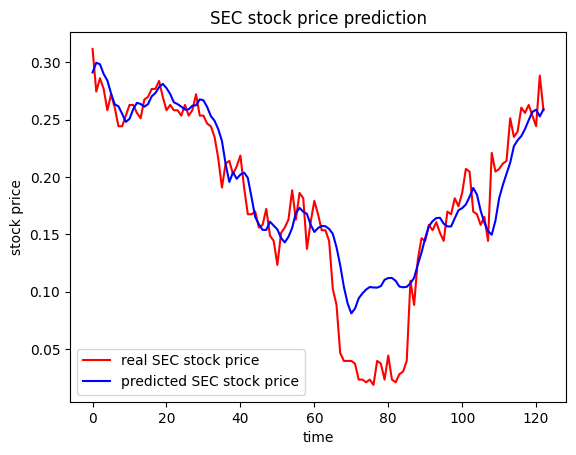

In [41]:
pred_y = model2.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [42]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))
print("RMSE :", RMSE(test_y, y_predict))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, y_predict)
print("R2 :", f2_y_predict)

RMSE : 0.2804690524342987
R2 : -11.335932628976208


In [31]:
#강원랜드

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


df = fdr.DataReader('035250', '2018-01-01', '2023-01-01') #서남
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()

#며칠데이터로 예측
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)
    
    
n=len(data_y)

train_X = np.array(data_X[0:int(n*0.7)])
train_y = np.array(data_y[0:int(n*0.7)])

val_X = np.array(data_X[int(n*0.7):int(n*0.9)])
val_y = np.array(data_y[int(n*0.7):int(n*0.9)])

test_X = np.array(data_X[int(n*0.9):])
test_y = np.array(data_y[int(n*0.9):])

validation_data = (val_X,val_y)

model2 = Sequential()


forward_layer = LSTM(64, return_sequences=True)
backward_layer = LSTM(64, activation='relu', return_sequences=True,
                      go_backwards=True)

model2.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                        input_shape=(10, 4)))

model2.add(Dropout(0.2))

model2.add(Bidirectional(LSTM(64)))

model2.add(Dropout(0.2))

model2.add(Dense(units=1))


model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_10 (Bidirecti  (None, 10, 128)          35328     
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 10, 128)           0         
                                                                 
 bidirectional_11 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 134,273
Trainable params: 134,273
Non-tr

In [32]:
model2.compile(optimizer='adam', 
              loss='mean_squared_error')
model2.fit(train_X, 
          train_y, 
          epochs=100, 
          batch_size=30,
          validation_data=validation_data
         )



pred_y = model2.predict(test_X)

Epoch 1/100
29/29 [==============================] - 7s 61ms/step - loss: 0.0520 - val_loss: 0.0048
Epoch 2/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0071 - val_loss: 0.0023
Epoch 3/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0051 - val_loss: 0.0018
Epoch 4/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0052 - val_loss: 0.0030
Epoch 5/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0049 - val_loss: 0.0018
Epoch 6/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0045 - val_loss: 0.0024
Epoch 7/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 8/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 9/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0042 - val_loss: 0.0020
Epoch 10/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0041 - val_loss: 0.0016

29/29 [==============================] - 0s 15ms/step - loss: 0.0017 - val_loss: 8.4682e-04
Epoch 82/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 83/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0017 - val_loss: 8.9903e-04
Epoch 84/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0018 - val_loss: 8.5319e-04
Epoch 85/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 86/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0018 - val_loss: 8.7445e-04
Epoch 87/100
29/29 [==============================] - 1s 17ms/step - loss: 0.0018 - val_loss: 8.5648e-04
Epoch 88/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 89/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 90/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0016 - 

4/4 [==============================] - 0s 6ms/step


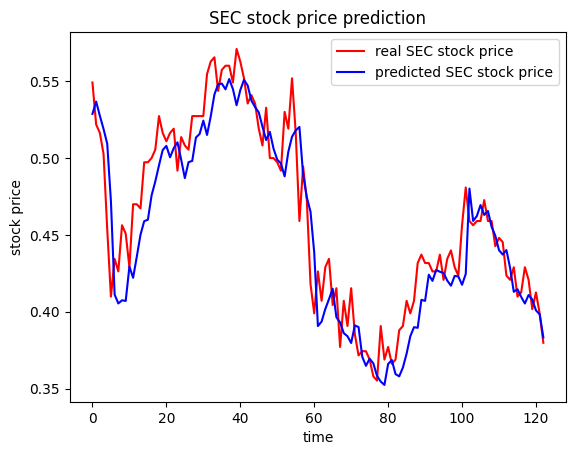

In [33]:
pred_y = model2.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [34]:
mse = model2.evaluate(test_X, test_y, batch_size=30)
print("mse :", mse)

y_predict = model2.predict(test_X)

5/5 [==============================] - 0s 5ms/step - loss: 5.2717e-04
mse : 0.0005271693808026612
4/4 [==============================] - 0s 7ms/step


In [35]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))
print("RMSE :", RMSE(test_y, y_predict))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, y_predict)
print("R2 :", f2_y_predict)

RMSE : 0.022960169009595913
R2 : 0.8457778431227259


In [36]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [37]:
from xgboost.sklearn import XGBClassifier, XGBRegressor

In [38]:
my_model = xgb.XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=100)


my_model.fit(X_train, y_train, verbose=False)

NameError: name 'xgb' is not defined

In [ ]:
print(reg.predict(X)) 
print()

In [ ]:
print('R2 : ', reg.score(X,y)) ## 테스트 성능 평가 점수(Accuracy)
print()

In [9]:
train_X.shape

(855, 10, 4)